# Exploring data using Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. 

Our training data set contains a bunch of information about approximately one thousand rollercoasters. The input file is a CSV file stored in folder data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## DataFrame
We're going to store the data from the CSV file in the so-called 'data frame'. A data frame is a two-dimensional, size-mutable (meaning that elements can be appended or deleted from a data frame), potentially heterogeneous tabular data. Potentially heterogeneous data means that the data may be of the same type within each column but it could be a different data type for each column and are implicitly or explicitly labelled with an index.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dictionary-like container for Series objects. 

Dictionaries are sometimes found in other languages as “associative memories” or “associative arrays”. Unlike sequences, which are indexed by a range of numbers, dictionaries are indexed by keys, which can be any immutable type; strings and numbers can always be keys. 

A complete set of attributes and methods of the data frame can be found here, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. We're going to use many of them in this tutorial.

In [2]:
# In order to display all columns, set the Pandas option 'display.max_columns' to 'None'.
pd.set_option('display.max_columns', None)
# to load input CSV file into the data frame
df = pd.read_csv('data/coaster_db.csv')
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2

In [3]:
# to show number of rows and columns
df.shape

(1087, 56)

In [4]:
# to show first five rows
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
# to show last five rows
df.tail(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,Vertical chain lift hill,NaN,Single car trains with riders arranged 4 acros...,Jungle X-Pedition,0:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Crypt,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,131 ft (40 m),3.0,Chain lift hill,NaN,NaN,DC Universe,NaN,NaN,NaN,NaN,87°,127 ft (39 m),NaN,NaN,Green Lantern: First Flight Tidal Wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,2022-01-01,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [6]:
# a quick statistic summary
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [7]:
# to show the name of each column
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
# to show the type of each column
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [9]:
# to clean up the data frame of columns we're not going to need
df = df[['coaster_name', 
        # 'Length', 'Speed', 
        'Location', 'Status', 
        # 'Opening date',
        # 'Type', 
        'Manufacturer', 
        # 'Height restriction', 'Model', 'Height',
        # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
        # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
        # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
        # 'Track layout', 'Fastrack available', 'Soft opening date.1',
        # 'Closing date', 
        # 'Opened', 
        # 'Replaced by', 'Website',
        # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
        # 'Single rider line available', 'Restraint Style',
        # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
       # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       # 'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
df.head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [10]:
# to convert object to date/time
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [11]:
# to rename columns to give them uniform look
df = df.rename(columns={'coaster_name': 'Coaster_Name', 
                        'year_introduced': 'Year_Introduced',
                        'latitude': 'Latitude', 
                        'longitude': 'Longitude',
                        'opening_date_clean': 'Opening_Date', 
                        'speed_mph': 'Speed_mph',
                        'height_ft': 'Height_ft', 
                        'Inversions_clean': 'Inversions', 
                        'Gforce_clean': 'Gforce'})
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [12]:
# to identify undefined values
df.isna().sum()    

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

## Removing duplicate values
Duplicate values tend to skew the statistics therefore it's paramount to get rid of them before you start with exploring your data set.

In [13]:
# to find duplicates
df.loc[df.duplicated()]  

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [14]:
# to test duplicity on key columns
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [15]:
# The method 'duplicated' always only shows the second duplicate line.
# So let's investigate one particular duplicate.
df.query('Coaster_Name == "Crystal Beach Cyclone"')
# All values are identical except 'Year_Introduced'.

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [16]:
# Remove all duplicates with a certain number of columns that are the same.
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])
# Columns 'Coaster_Name', 'Location', 'Opening_Date' now becomes a 'compound key' that uniquely identifies each row. 
# The columns can be freely chosen.

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [17]:
# Let's locate the rows that are not duplicated. For that, we need to invert the result, using '~'.
~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [18]:
df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [19]:
# Notice that since we were dropping rows, the index now contains gaps. 
# To get rid of the gaps, reset the index.
# By default the method adds a new column 'index'. In order to get rid of it, run the method with 'drop=True'
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()
# Once we're done, we make the result our new cleaned-up data frame.
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [20]:
df.describe()

,Year_Introduced,Latitude,Longitude,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
count,990.000000,783.000000,783.000000,807,850.000000,159.000000,990.000000,324.000000
mean,1994.054545,38.375748,-41.591138,1994-09-02 10:13:49.739776896,49.017647,103.994340,1.308081,3.815093
min,1884.000000,-48.261700,-123.035700,1884-06-16 00:00:00,5.000000,13.100000,0.000000,0.800000
25%,1988.000000,35.100350,-85.745650,1987-09-21 00:00:00,37.300000,52.150000,0.000000,3.375000
50%,2000.000000,40.289700,-76.653500,2000-04-29 00:00:00,50.000000,91.900000,0.000000,4.000000
75%,2009.000000,44.799750,2.863400,2010-11-04 00:00:00,58.000000,133.850000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,2022-03-01 00:00:00,149.100000,377.300000,14.000000,12.000000
std,23.872027,15.549452,72.326633,NaN,16.847266,68.293609,2.026876,1.009229


## Reshaping and pivot tables

In [21]:
# All n/a must be dropped before minimum and maximum value is established!
min_val = min(list(df['Height_ft'].dropna()))
max_val = max(list(df['Height_ft'].dropna()))
# Normalize the height (0.0 .. 1.0)
df['Norm_Height_ft'] = [(x - min_val) / max_val for x in df['Height_ft']]
h_cat   = ['XS', 'S', 'M', 'L', 'XL']
def f (x): # distribute the flag equally by normalized height
    if x < .2:
        return h_cat[0]
    if x < .4:
        return h_cat[1]
    if x < .6:
        return h_cat[2]
    if x < .8:
        return h_cat[3]
    if x >= .8:
        return h_cat[4]
    
    return "N/A"

df['Height_Flag'] = [f(x) for x in df['Norm_Height_ft']]

# Does the material of the coaster affect the speed with regard to height?
pd.pivot_table(df, values='Speed_mph', index=['Type_Main'], columns=['Height_Flag'])[h_cat] # sort columns by h_cat

Height_Flag,XS,S,M,L,XL
Type_Main,,,,,
Other,NaN,48.350000,68.80,83.30,NaN
Steel,35.396226,55.963462,83.50,83.76,102.266667
Wood,42.187500,55.766667,68.05,NaN,NaN


## Normality tests
In statistics, normality tests are used to check if the data is drawn from a Gaussian (normal) distribution. 

### Quantile-Quantile plot

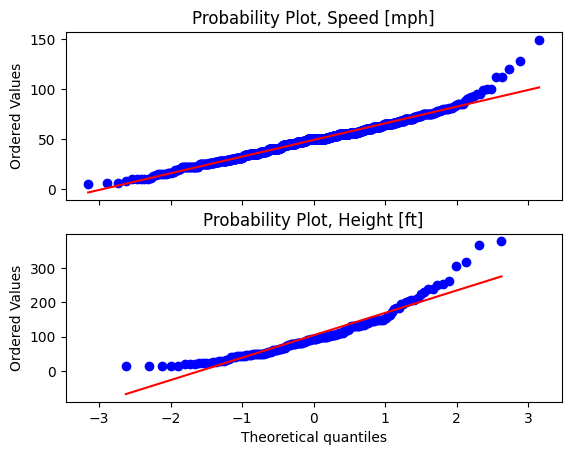

In [22]:
# This example is using subplots, see https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html to find out more.
from scipy import stats

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
res1 = stats.probplot(df['Speed_mph'].dropna(), dist='norm', plot=ax1)
ax1.set_title('Probability Plot, Speed [mph]')
ax1.label_outer() # Remove x-label of the first plot 
res2 = stats.probplot(df['Height_ft'].dropna(), dist='norm', plot=ax2)
ax2.set_title('Probability Plot, Height [ft]')
plt.show()
# The closer our data is to the red line, the better.

### Box plot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are.

<ul>
    <li><b>Median</b> (Q2/50th percentile): The middle value of the data set
    <li><b>First Quartile</b> (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set
    <li><b>Third Quartile</b> (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
    <li><b>Interquartile Range</b> (IQR): 25th to the 75th percentile
    <li><b>Outliers</b> (rhombus shape)
    <li><i>“maximum”</i>: Q3 + 1.5*IQR (left whisker)
    <li><i>“minimum”</i>: Q1 -1.5*IQR (right whisker)
</ul>

<Axes: >

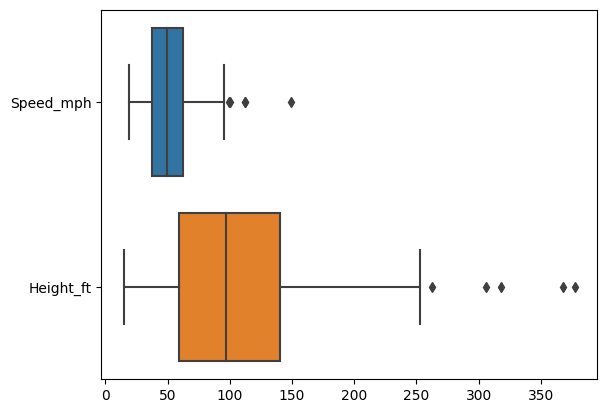

In [23]:
# Box Plot
sns.boxplot(data=df[['Speed_mph', 'Height_ft']].dropna(), orient='h')

### Shapiro-Wilk test

In [24]:
from scipy.stats import shapiro

def eval(p):
    if p <= .05:
        print('Rejecting the null hypothesis. The distribution is probably not gaussian.')
    else:
        print('Not rejecting the null hypothesis. The distribution is probably gaussian.')

def intro():
    print('Null hypothesis: Distribution is gaussian.')
    
intro()
stat, p = shapiro(df['Speed_mph'].dropna())
print('stat={}, p={}\n'.format(stat, p))
eval(p)

Null hypothesis: Distribution is gaussian.
stat=0.9736213088035583, p=2.8333224655341382e-11

Rejecting the null hypothesis. The distribution is probably not gaussian.


### D’Agostino’s K-squared test
D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis.

Skewness is a measure of symmetry. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [25]:
from scipy.stats import normaltest

intro()
stat, p = normaltest(df['Speed_mph'].dropna())
print('stat={}, p={}\n'.format(stat, p))
eval(p)

Null hypothesis: Distribution is gaussian.
stat=94.01182017033706, p=3.85116949730645e-21

Rejecting the null hypothesis. The distribution is probably not gaussian.


### Anderson-Darling test

In [26]:
from scipy.stats import anderson

res = anderson(df['Speed_mph'].dropna())
print('stat={}'.format(res.statistic))
for i in range(len(res.critical_values)):
    sig_lev, crit_val = res.significance_level[i], res.critical_values[i]
    if res.statistic < crit_val:
        print(f'Probably gaussian : {crit_val} critical value at {sig_lev} level of significance')
    else:
        print(f'Probably not gaussian : {crit_val} critical value at {sig_lev} level of significance')

stat=2.8511046010895598
Probably not gaussian : 0.573 critical value at 15.0 level of significance
Probably not gaussian : 0.653 critical value at 10.0 level of significance
Probably not gaussian : 0.783 critical value at 5.0 level of significance
Probably not gaussian : 0.914 critical value at 2.5 level of significance
Probably not gaussian : 1.087 critical value at 1.0 level of significance


### Chi-Square test

In [27]:
from scipy.stats import chisquare

intro()
stat, p = chisquare(df['Speed_mph'].dropna())
print('stat={}, p={}\n'.format(stat, p))
eval(p)

Null hypothesis: Distribution is gaussian.
stat=4916.025345013801, p=0.0

Rejecting the null hypothesis. The distribution is probably not gaussian.


### Kolmogorov-Smirnov test

In [28]:
from scipy.stats import kstest

intro()
stat, p = kstest(df['Speed_mph'].dropna(), 'norm')
print('stat={}, p={}\n'.format(stat, p))
eval(p)

Null hypothesis: Distribution is gaussian.
stat=0.9999997133484281, p=0.0

Rejecting the null hypothesis. The distribution is probably not gaussian.


## Univariate analysis
Once we're done with cleaning up our data set we can start looking at individual features of this data set. What the distribution of those features are, whether there are any outliers and so on.

In [29]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce,Norm_Height_ft,Height_Flag
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9,NaN,N/A
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0,NaN,N/A
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN,NaN,N/A
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN,NaN,N/A
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN,NaN,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN,NaN,N/A
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN,0.243573,S
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN,NaN,N/A
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN,NaN,N/A


In [30]:
# setting a style is not necessary 
# available styles, https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8-deep')

In [31]:
# To count how many unique values occur in the data set, ordered from most to least occuring.
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

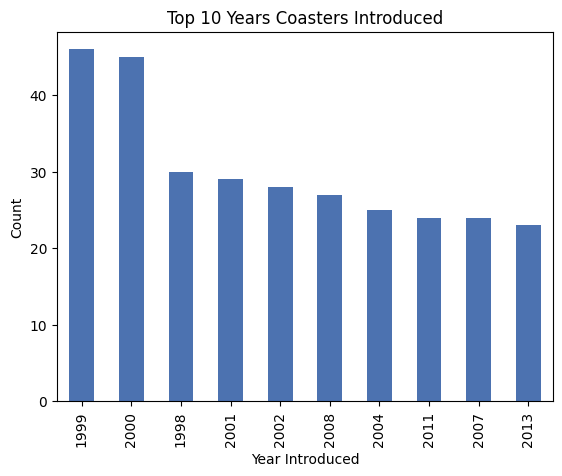

In [32]:
# let's plot the top 10
ax = df['Year_Introduced'].value_counts() \
.head(10).plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

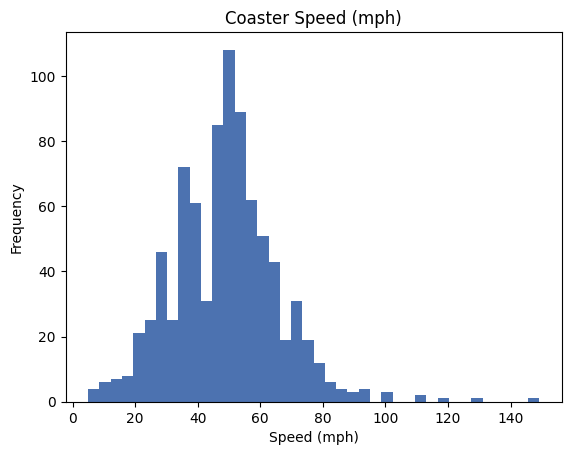

In [33]:
# to show the histogram
ax = df['Speed_mph'].plot(kind='hist', bins=40, title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

A kernel density estimate (KDE) represents the data using a continuous probability density curve in one or more dimensions.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.



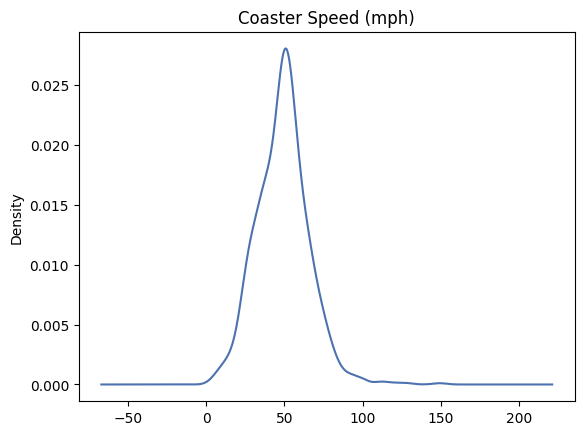

In [34]:
# to show normalized histogram, i.e. kernel density plot (to run this code, scipy module is required!)
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed (mph)')

Text(0.5, 0, 'Height (ft)')

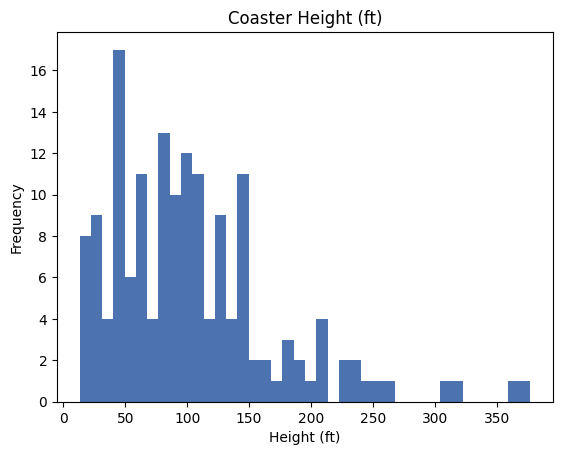

In [35]:
# one more histogram, this time showing the distribution of the height feature 
ax = df['Height_ft'].plot(kind='hist', bins=40, title='Coaster Height (ft)')
ax.set_xlabel('Height (ft)')

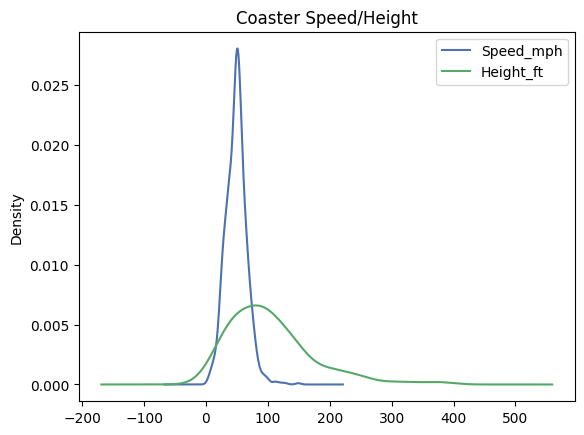

In [36]:
# to show more properties at once
ax = df[['Speed_mph', 'Height_ft']].plot(kind='kde', title='Coaster Speed/Height')
# Note that the KDE extrapolation may produce slightly misleading output. 
# Compare the 'Coaster Height (ft)' histogram from a previous example with 'Height' KDE below 
# (hint: there are no negative values in height feature)

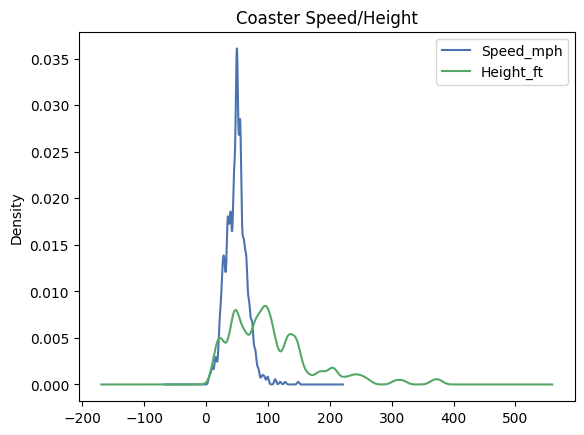

In [37]:
# bw_method attribute defines the method used to calculate the estimator bandwidth. 
# This can be ‘scott’, ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde
ax = df[['Speed_mph', 'Height_ft']].plot(kind='kde', bw_method=.1, title='Coaster Speed/Height')

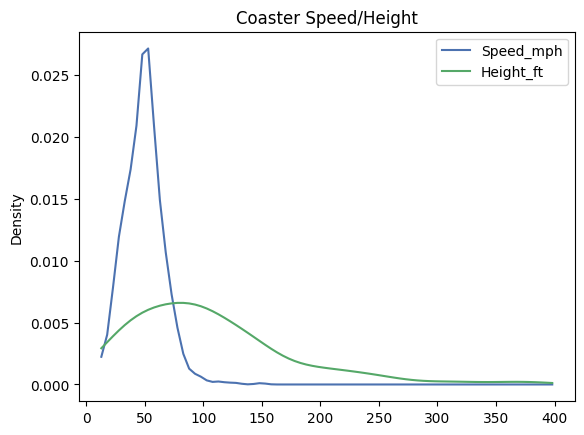

In [38]:
# eventually set the points at which the probability density funcion will be evaluated
start_x = int(df[['Speed_mph', 'Height_ft']].min().max())
ax = df[['Speed_mph', 'Height_ft']].plot(kind='kde', ind=range(start_x, 400, 5), title='Coaster Speed/Height')

## Feature Relationships

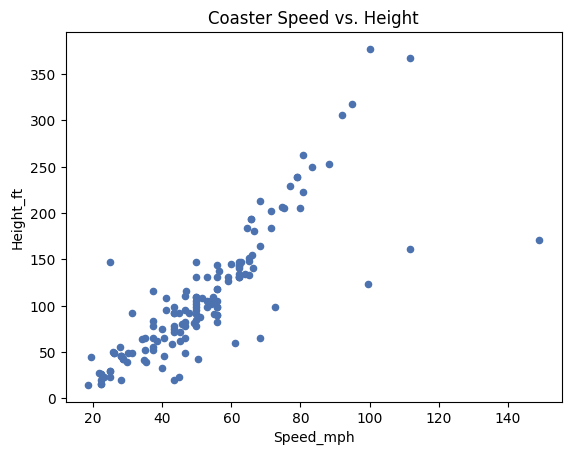

In [39]:
# scatter plot, showing relationship between speed and height
df.plot(kind='scatter', x='Speed_mph', y='Height_ft', 
        title='Coaster Speed vs. Height')
plt.show() # to get rid of the information about the plot object

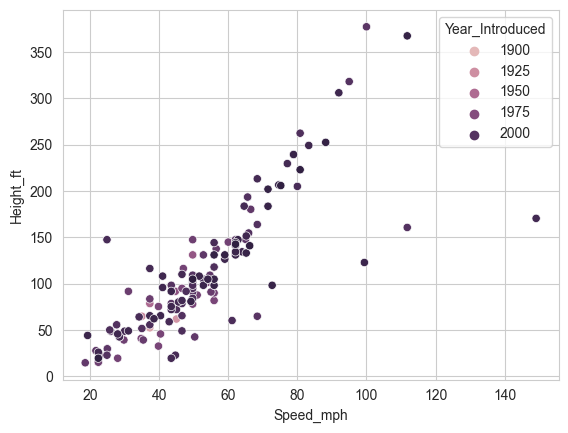

In [40]:
# Seaborn scatter plot allows us to have different colored dots based 
# on the year that the rollercoster was introduced
sns.set_style("whitegrid")
sns.scatterplot(x='Speed_mph', y='Height_ft', 
                hue='Year_Introduced', data=df)
plt.show()
# Now we can clearly see that not only speed correlates to the height 
# but also that higher coasters are built year after year.

In [41]:
top_manufacturers = df['Manufacturer'].value_counts().head(11).keys()
top_manufacturers

Index(['Vekoma', 'Bolliger & Mabillard', 'Intamin', 'Mack Rides',
       'Arrow Dynamics', 'Gerstlauer', 'Anton Schwarzkopf',
       'Philadelphia Toboggan Coasters', 'Custom Coasters International',
       'Rocky Mountain Construction', 'Great Coasters International'],
      dtype='object', name='Manufacturer')

In [42]:
# Coasters produced by remaining manufacturers.
df['Manufacturer'].value_counts()[10:].sum()

336

In [43]:
df['Top_Manufacturer'] = [x if x in top_manufacturers else 'Other' for x in df['Manufacturer']]
df.iloc[:]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce,Norm_Height_ft,Height_Flag,Top_Manufacturer
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9,NaN,N/A,Other
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0,NaN,N/A,Other
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN,NaN,N/A,Other
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN,NaN,N/A,Other
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN,NaN,N/A,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN,NaN,N/A,Other
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN,0.243573,S,Other
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN,NaN,N/A,Intamin
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN,NaN,N/A,Other


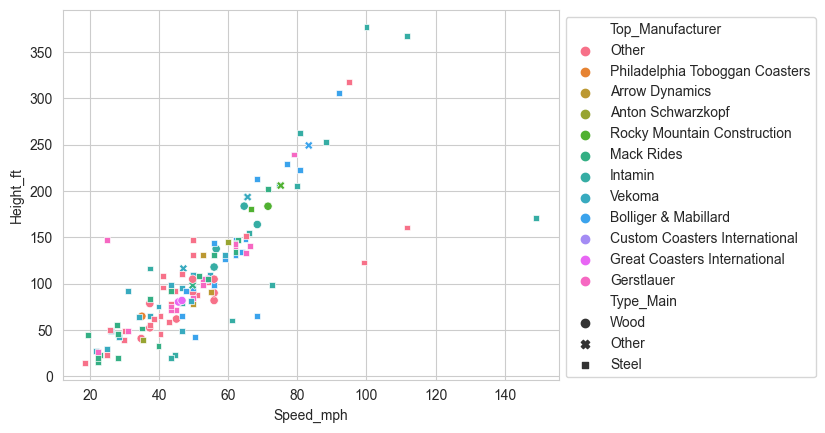

In [44]:
from mplcursors import cursor

# callback function to extract name of the coaster and manufacturer from the data frame 
# based on speed and height of selected dot
def f(speed, height):
    r = df.query('Speed_mph==@speed and Height_ft==@height')
    cn_vals = r['Coaster_Name'].values
    m_vals  = r['Manufacturer'].values
    return '{} (man. {})'.format(cn_vals[0] if len(cn_vals)>0 else 'N/A', 
                                 m_vals[0] if len(m_vals)>0 else 'N/A')

# 'Top_Manufacturer' feature is to be used as a hue
df['Top_Manufacturer'] = [x if x in top_manufacturers else 'Other' for x in df['Manufacturer']]
# create a scatter plot
ax = sns.scatterplot(x='Speed_mph', y='Height_ft', palette='husl',
                hue='Top_Manufacturer', style='Type_Main', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# the name of the coaster together with the name of the manufacturer shows up when you mover cursor over the dots 
# works only when displayed in python's plot viewer
crs = cursor(ax, hover=True)
crs.connect("add", lambda sel: sel.annotation.set_text(f(sel.target[0], sel.target[1])))

plt.show()

Scatter plot with hover mouse description.

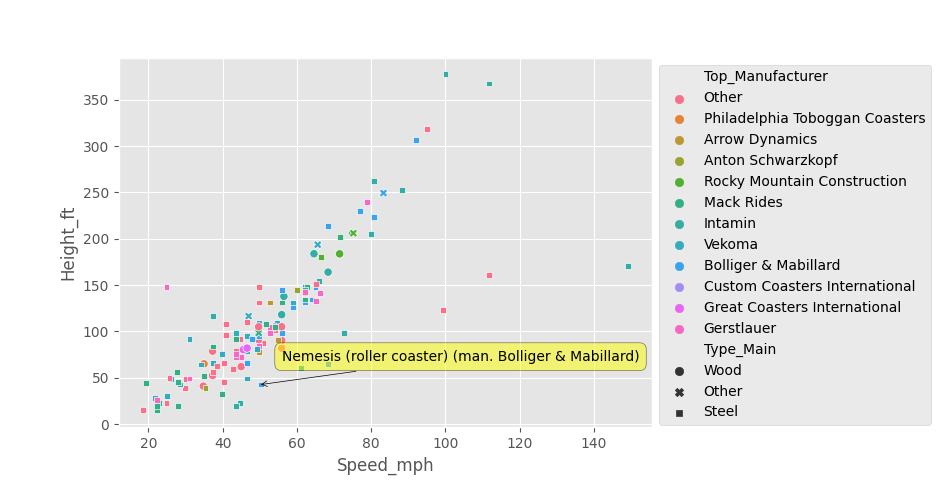

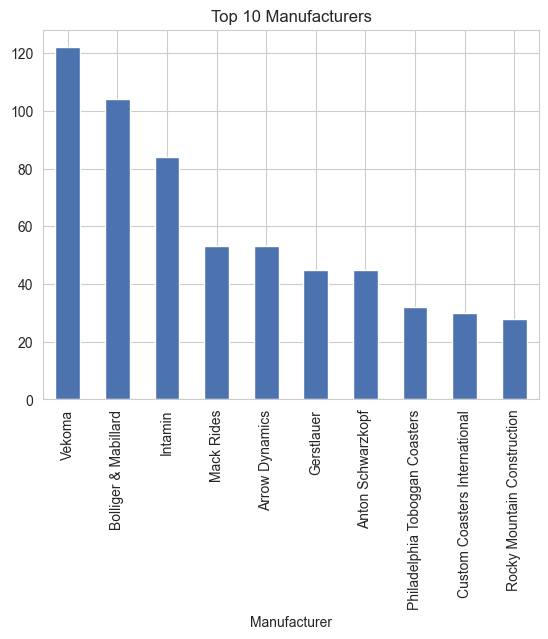

In [45]:
ax = df['Manufacturer'].value_counts() \
.head(10).plot(kind='bar', title='Top 10 Manufacturers')

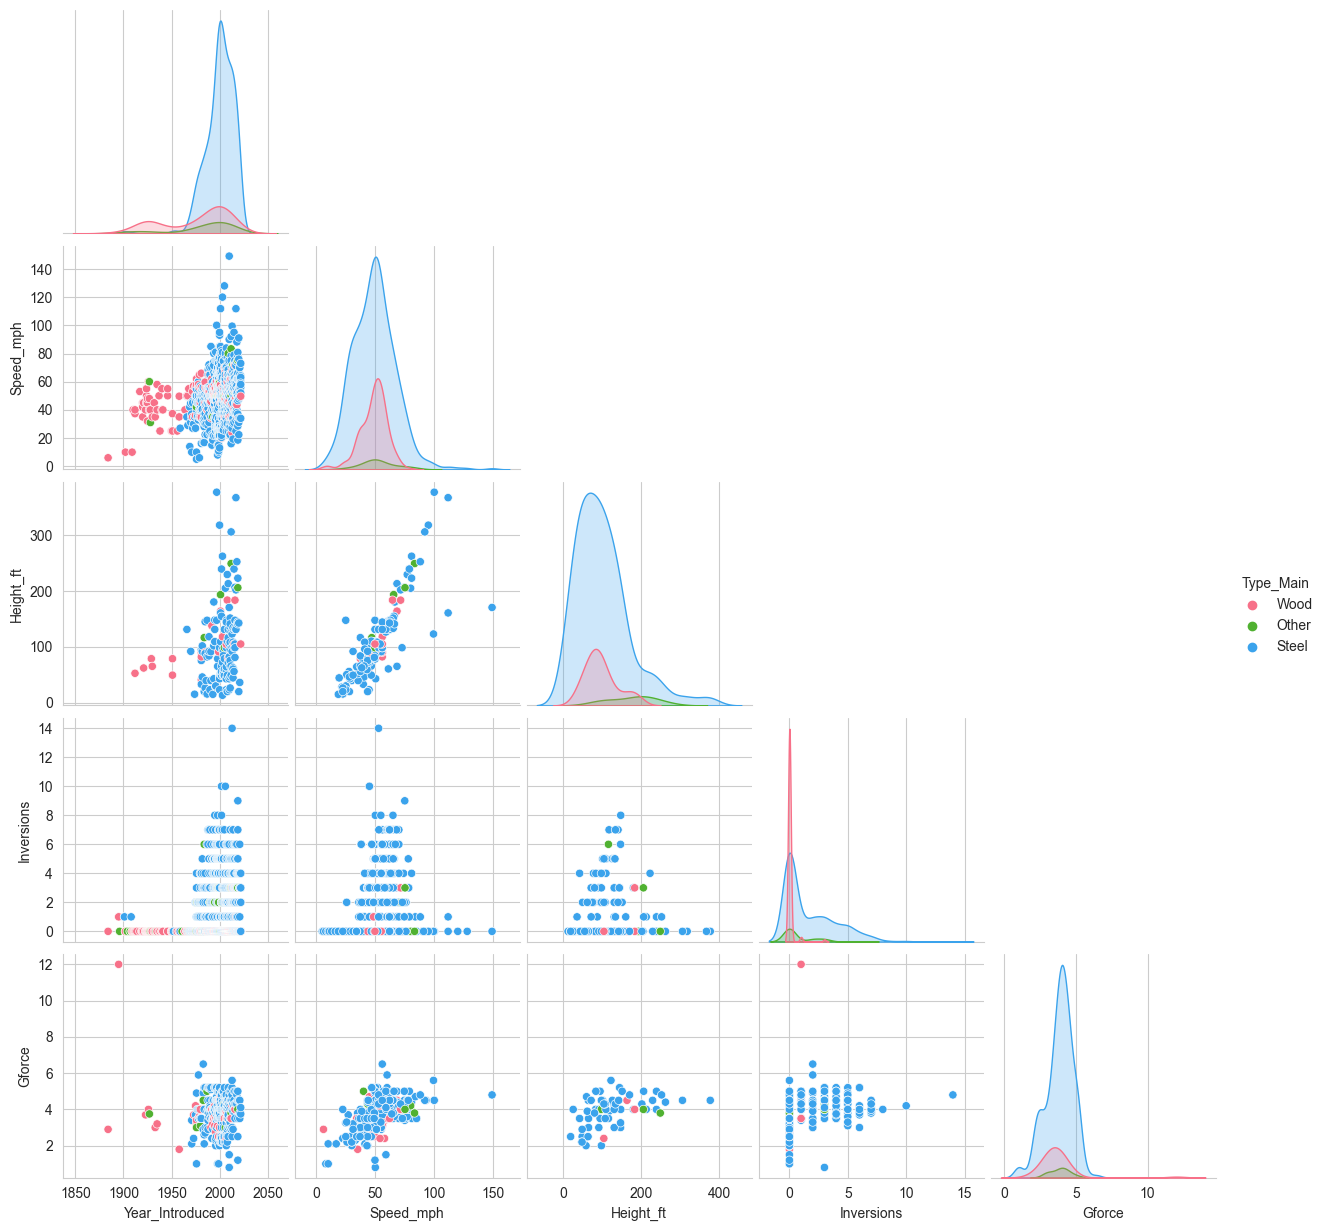

In [46]:
# What if we want to compare more features at once?
sns.pairplot(data=df, 
             vars=['Year_Introduced', 'Speed_mph', 'Height_ft', 
                   'Inversions', 'Gforce'],
             hue='Type_Main',
             corner=True,
             diag_kind="kde",
             palette='husl'
            )
plt.show()

In [47]:
# Another useful characteristic is a correlation.
df_corr = df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

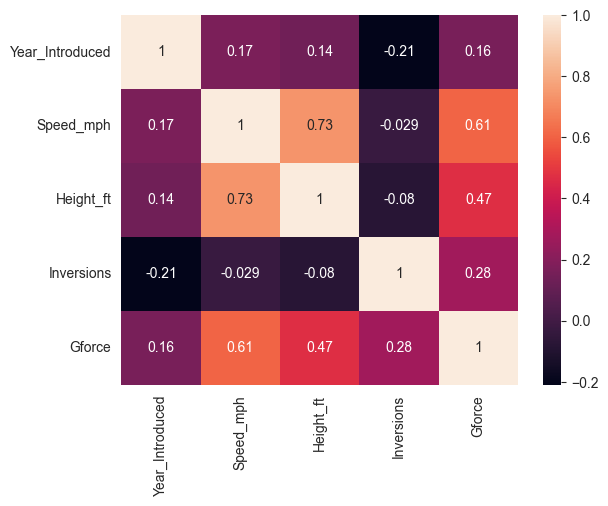

In [48]:
sns.heatmap(df_corr, annot=True)
plt.show

## Question 1: What are the locations with the fastests rollercosters?
(limited to locations with at least 10 coasters)

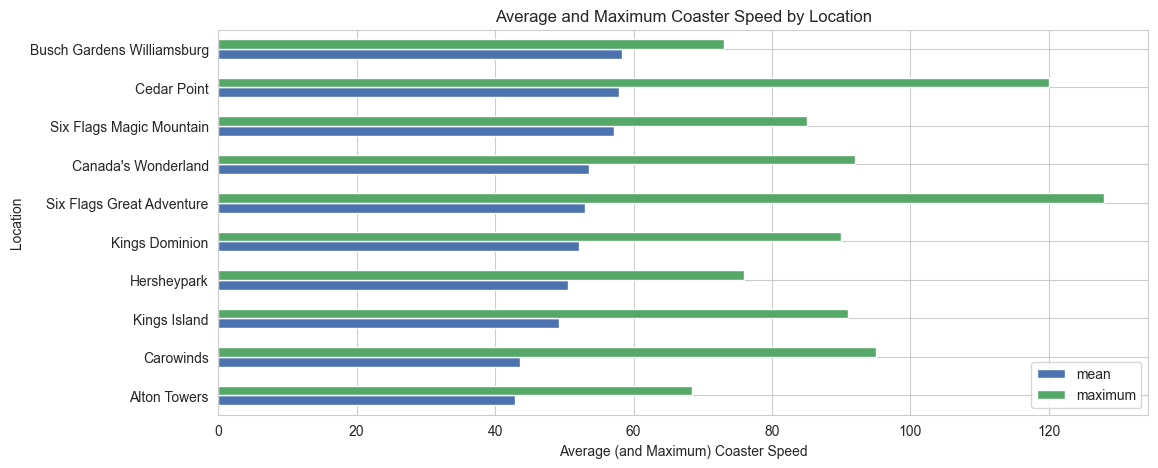

In [53]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['count', 'mean', np.max]) \
    .query('count >= 10') \
    .sort_values('mean')[['mean', 'amax']] \
    .plot(kind='barh', figsize=(12, 5), title='Average and Maximum Coaster Speed by Location')
ax.set_xlabel('Average (and Maximum) Coaster Speed')
ax.legend(['mean', 'maximum'])
plt.show()